In [194]:
#Importing libraries and dependencies

import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [195]:
# images labelling, cleaning, and uploading

data_dir = 'E:\TrafficClass\TrafficSign\Train'

In [196]:
os.listdir(data_dir)

['Access Denied',
 'Asymmetrical bottleneck on the right',
 'Bicycle circulation ban',
 'Children',
 'Dangerous double bend, the first on the left',
 'Dangerous left curve',
 'Dangerous right curve',
 'Dangers',
 'Deformed Road',
 'End of previous bans',
 'End of the overtaking ban for trucks',
 'Give right to pass',
 'Go straight or turn left',
 'Go straight or turn right',
 'Ice',
 'Intersection with a road that has no priority',
 'Intersection with mandatory roundabout route',
 'Jobs',
 'Mandatory passage on the left',
 'Mandatory passage on the right',
 'Mandatory Straight Direction',
 'Mandatory Turn Left',
 'Mandatory Turn Right',
 'No Overtaking',
 'No overtaking for trucks',
 'No Passing',
 'Overtaking ban ends',
 'Pedestrians',
 'Road with right of way',
 'Slippery Road',
 'Speed Limit 100',
 'Speed Limit 120',
 'Speed Limit 20',
 'Speed Limit 30',
 'Speed Limit 50',
 'Speed Limit 60',
 'Speed Limit 70',
 'Speed Limit 80',
 'Speed Limit Crossed',
 'Stop',
 'Stoplight',
 'Truck

In [197]:
image_exts = ['jpeg','jpg','png']

In [198]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)

In [199]:
#Loading the data

data = tf.keras.utils.image_dataset_from_directory('E:\TrafficClass\TrafficSign\Train')

Found 39209 files belonging to 43 classes.


In [200]:
data_iterator = data.as_numpy_iterator()

In [201]:
#Get another batch from the iterator
batch = data_iterator.next()

In [202]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [203]:
batch[1]

array([21, 33, 28,  6,  4,  3, 28, 33, 20, 28, 11, 23, 34, 34,  7, 30, 23,
       34,  3, 32, 31, 31,  5, 37, 37, 39, 30, 15,  7, 33, 28,  6])

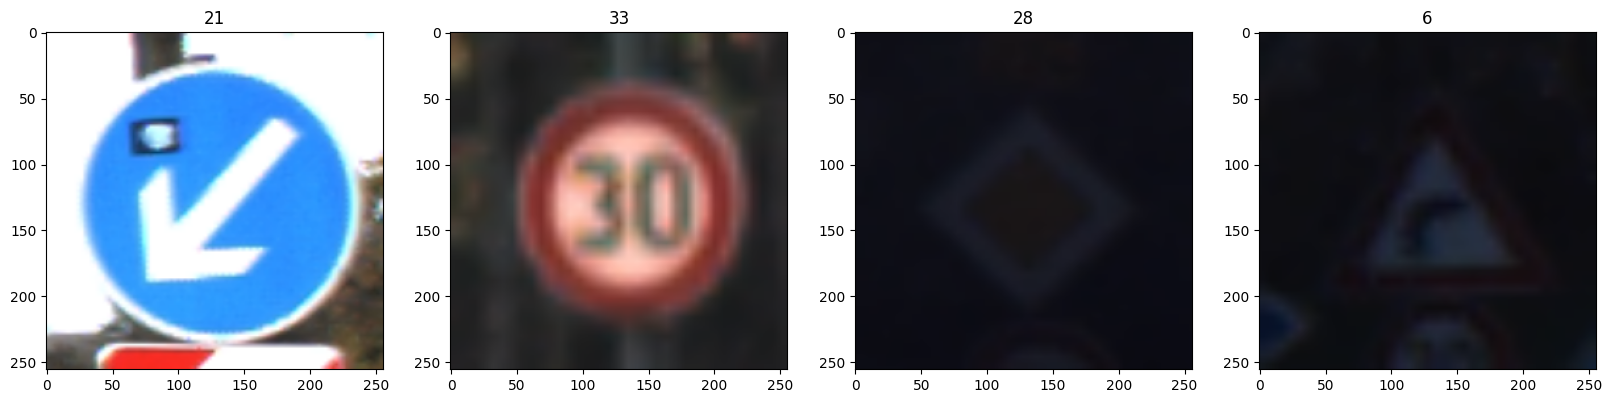

In [204]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [205]:
#Preprocess the data
data = data.map(lambda x, y: (x/255, y))

In [206]:
scaled_iterator = data.as_numpy_iterator()

In [207]:
batch = scaled_iterator.next()

In [208]:
batch[0].min()

0.0027550193

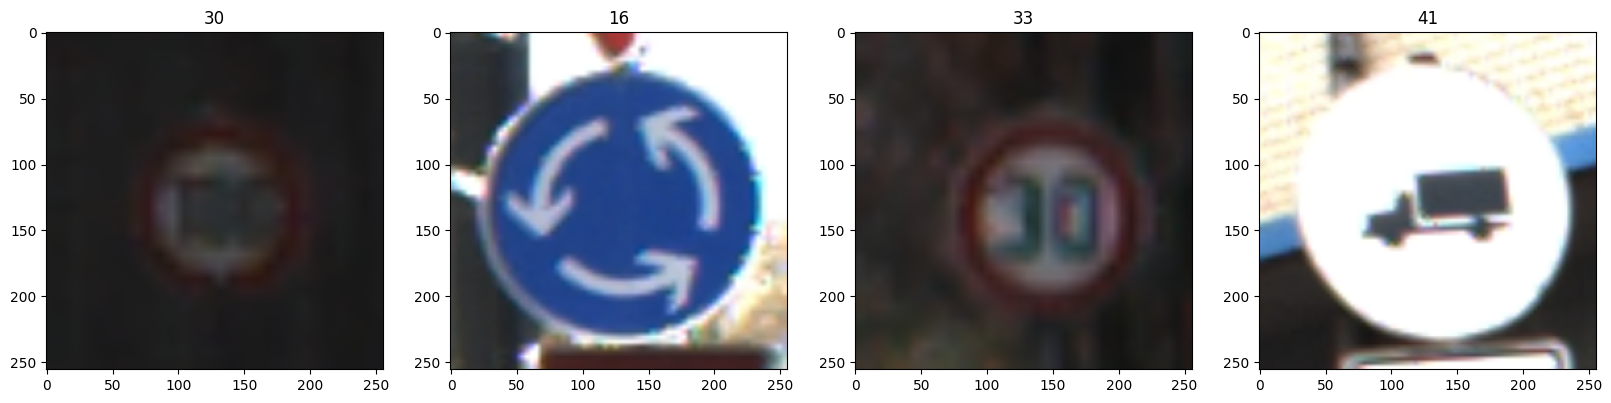

In [209]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [210]:
#Data Splitting

len(data)

1226

In [211]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [213]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [214]:
# Building the model
model = Sequential()

In [215]:
#Layers designing

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(43, activation='softmax'))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [222]:
 #Stochastic Gradient Descent (SGD) Optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.5, staircase=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [223]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,707,419 (14.14 MB)

 Trainable params: 3,707,419 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [224]:
#Train the model
logdir = 'E:\TrafficClass\logs'

In [225]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [228]:
hist = model.fit(train, epochs=10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10


858/858 ━━━━━━━━━━━━━━━━━━━━ 266s 310ms/step - accuracy: 0.6648 - loss: 1.1528 - val_accuracy: 0.8209 - val_loss: 0.5877
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 221s 258ms/step - accuracy: 0.8426 - loss: 0.5242 - val_accuracy: 0.8913 - val_loss: 0.3520
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 229s 266ms/step - accuracy: 0.9213 - loss: 0.2768 - val_accuracy: 0.9184 - val_loss: 0.2869
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 235s 274ms/step - accuracy: 0.9525 - loss: 0.1717 - val_accuracy: 0.9123 - val_loss: 0.2927
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 243s 283ms/step - accuracy: 0.9636 - loss: 0.1393 - val_accuracy: 0.9554 - val_loss: 0.1689
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 249s 290ms/step - accuracy: 0.9820 - loss: 0.0752 - val_accuracy: 0.9618 - val_loss: 0.1473
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 250s 291ms/step - accuracy: 0.9872 - loss: 0.0483 - val_accuracy: 0.9385 - val_loss: 0.2392
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 235s 274ms/step - accuracy: 0.9868 - loss: 0.05

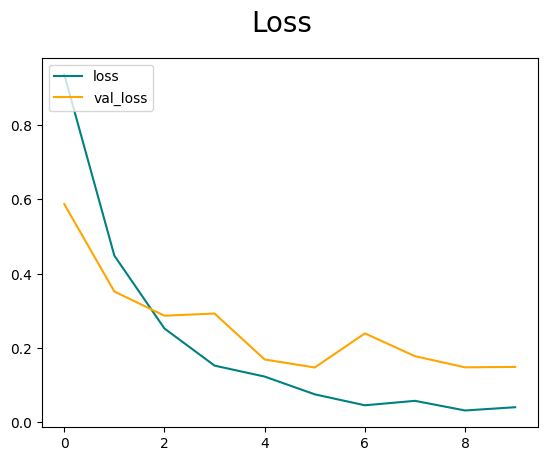

In [231]:
#Plotting loss and accuracy

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

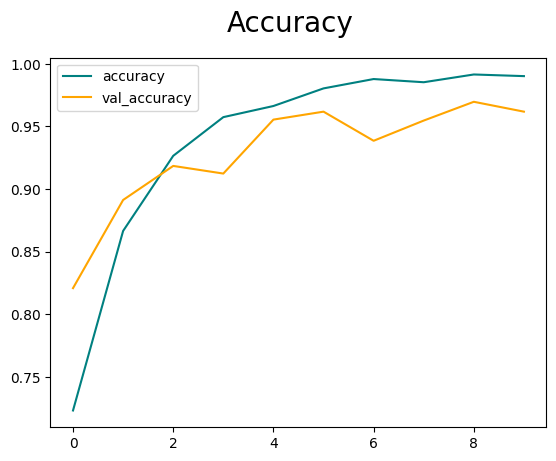

In [232]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [233]:
#Evaluating the model

model.evaluate(test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.9613 - loss: 0.1505


[0.15289965271949768, 0.961607813835144]

In [245]:
results = model.evaluate(test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

y_true = []
y_pred = []
y_pred_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    preds = model.predict(X)
    y_pred_probs.extend(preds)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(y)

y_true = np.array(y_true)  
y_pred = np.array(y_pred)  
y_pred_probs = np.array(y_pred_probs)  
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

top_k_categorical_accuracy = tf.keras.metrics.top_k_categorical_accuracy(
    tf.convert_to_tensor(y_true, dtype=tf.int32), 
    tf.convert_to_tensor(y_pred_probs, dtype=tf.float32), 
    k=5
).numpy()
print(f"Top-5 Categorical Accuracy: {np.mean(top_k_categorical_accuracy):.4f}")

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

n_classes = model.output_shape[-1]  
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))  

roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_probs[:, i])

average_auc = np.mean(list(roc_auc.values()))
print(f"Average ROC AUC: {average_auc:.4f}")

122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 100ms/step - accuracy: 0.9609 - loss: 0.1532
Test Loss: 0.1537
Test Accuracy: 0.9614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132m

InvalidArgumentError: {{function_node __wrapped__InTopKV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} targets must be 1-dimensional [Op:InTopKV2] name: 

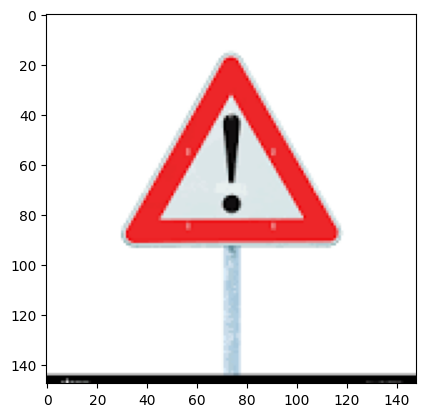

In [ ]:
#Testing the model

img = cv2.imread('E:\TrafficClass\TrafficSign\Dangers.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

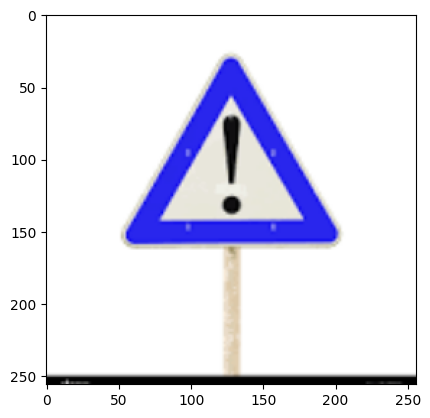

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


In [240]:
yhat

32